<a href="https://colab.research.google.com/github/cmoestl/heliocats/blob/master/read_helio_catalogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#read-helio-catalogs

This notebook demonstrates how to use the heliospheric event catalogs in menu "data" on  

https://helioforecast.space

ARRCAT, ICMECAT, SIRCAT 


Christian Möstl, IWF Graz Austria May 2020

https://github.com/cmoestl

https://twitter.com/chrisoutofspace

https://www.iwf.oeaw.ac.at/user-site/christian-moestl/

Installs sunpy first (takes ~20 seconds) at the start of each session, all other packages can be simply imported.

A google account is needed in order to open the notebook in playground mode and run it.


In [23]:
!pip install sunpy

In [0]:
import pickle
import pandas as pd
import numpy as np
import astropy
import sunpy
from sunpy.time import parse_time
import matplotlib.pyplot as plt
import seaborn as sns
#make figures bigger
plt.rcParams["figure.figsize"] = (10,5)

# HI ARRIVAL CATALOG (ARRCAT)


Read CME arrival catalog (ARRCAT) from heliospheric imager observations (HELCATS HIGeoCAT)

https://helioforecast.space/arrcat

The easiest version is to directly paste the url into a pandas function that makes a pandas dataframe from a csv file.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [0]:
url='https://helioforecast.space/static/sync/arrcat/HELCATS_ARRCAT_v20.csv'
ac=pd.read_csv(url)

In [26]:
ac

,Unnamed: 0,id,sc,target_name,sse_launch_time,target_arrival_time,target_arrival_time_err,target_distance,target_heeq_lon,target_heeq_lat,target_delta,sse_heeq_lon,sse_heeq_lat,sse_speed,sse_speed_err,target_speed,target_speed_err,pa_fit,pa_n,pa_s,pa_center
0,0,HCME_A__20180828_01,A,PSP,2018-08-28T14:13Z,2018-09-01T20:00Z,21.8,0.969,-7.92,5.86,-5.9,-2,0,400,82,396,81,270,255,280,267.5
1,1,HCME_A__20180919_01,A,PSP,2018-09-19T00:21Z,2018-09-21T11:16Z,2.4,0.846,-13.51,4.83,-13.5,0,4,633,26,597,25,275,260,290,275.0
2,2,HCME_A__20181026_01,A,PSP,2018-10-26T04:32Z,2018-10-27T22:51Z,2.1,0.330,10.47,1.33,26.5,-16,-19,433,21,324,16,250,210,260,235.0
3,3,HCME_A__20190402_01,A,PSP,2019-04-02T02:56Z,2019-04-02T22:39Z,0.1,0.180,-81.93,-2.98,-12.9,-69,4,400,3,379,3,285,270,290,280.0
4,4,HCME_A__20190513_01,A,PSP,2019-05-13T16:22Z,2019-05-15T17:35Z,9.1,0.796,69.65,3.54,19.6,50,0,768,137,672,120,260,235,280,257.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,1543,HCME_A__20180828_01,A,Mars,2018-08-28T14:13Z,2018-09-03T19:19Z,31.9,1.383,-12.89,5.08,-10.9,-2,0,400,82,385,79,270,255,280,267.5
1544,1544,HCME_A__20180919_01,A,Mars,2018-09-19T00:21Z,2018-09-23T08:01Z,4.3,1.382,-19.62,5.50,-19.6,0,4,633,26,554,23,275,260,290,275.0
1545,1545,HCME_A__20181026_01,A,Mars,2018-10-26T04:32Z,2018-11-01T09:25Z,7.2,1.396,-33.68,5.55,-17.7,-16,-19,433,21,390,19,250,210,260,235.0
1546,1546,HCME_A__20181211_01,A,Mars,2018-12-11T02:44Z,2018-12-17T09:33Z,0.4,1.437,-51.94,4.40,7.1,-59,8,402,1,396,1,275,260,280,270.0


In [27]:
print('get keys of ac dataframe')
print(ac.keys())

print('time as numpy array in matp')
ac_time_num=parse_time(ac.sse_launch_time).plot_date
print(ac_time_num)
print()

print('target distance as numpy array')
ac_target_distance=np.array(ac.target_distance)
print(ac_target_distance)


get keys of ac dataframe
Index(['Unnamed: 0', 'id', 'sc', 'target_name', 'sse_launch_time',
       'target_arrival_time', 'target_arrival_time_err', 'target_distance',
       'target_heeq_lon', 'target_heeq_lat', 'target_delta', 'sse_heeq_lon',
       'sse_heeq_lat', 'sse_speed', 'sse_speed_err', 'target_speed',
       'target_speed_err', 'pa_fit', 'pa_n', 'pa_s', 'pa_center'],
      dtype='object')
time as numpy array in matp
[736934.59236111 736956.01458333 736993.18888889 ... 736993.18888889
 737039.11388889 737085.04861111]

target distance as numpy array
[0.969 0.846 0.33  ... 1.396 1.437 1.493]


Make 2 plots


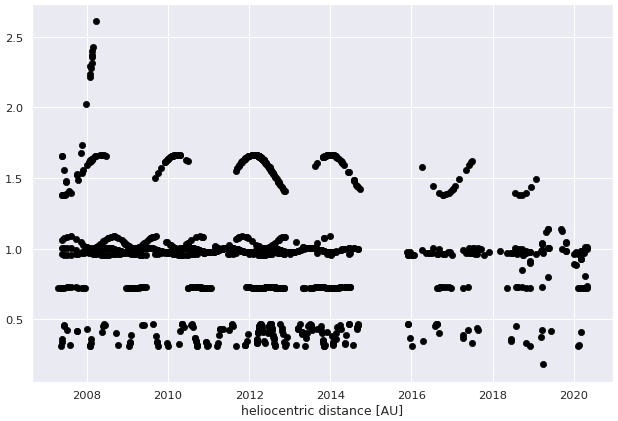

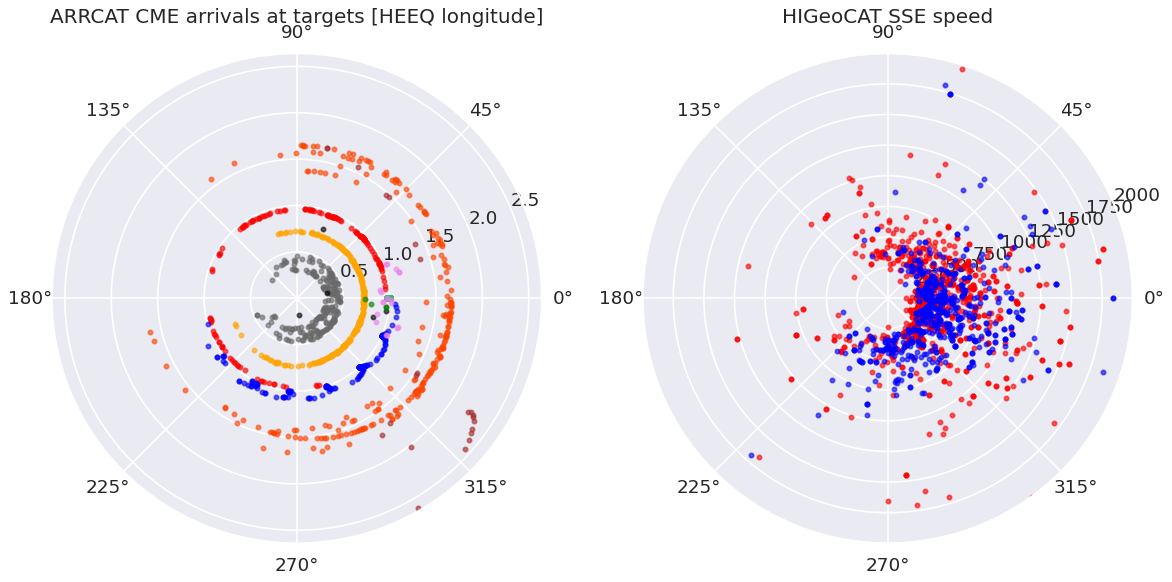

In [54]:

sns.set_context("talk")     
sns.set_style('darkgrid')
fig=plt.figure(1,figsize=(15,10),dpi=50)
plt.plot_date(ac_time_num,ac_target_distance,'ok')
plt.xlabel('heliocentric distance [AU]')



fig=plt.figure(2, figsize=(15,10), dpi=80) 
ax = plt.subplot(121,projection='polar') 

plt.title('ARRCAT CME arrivals at targets [HEEQ longitude]')

#get indices for each target
merci=np.where(ac.target_name=='Mercury')[0]
venusi=np.where(ac.target_name=='Venus')[0]
earthi=np.where(ac.target_name=='Earth_L1')[0]
marsi=np.where(ac.target_name=='Mars')[0]

stai=np.where(ac.target_name=='STEREO-A')[0]
stbi=np.where(ac.target_name=='STEREO-B')[0]
pspi=np.where(ac.target_name=='PSP')[0]
soloi=np.where(ac.target_name=='SolarOrbiter')[0]
bepii=np.where(ac.target_name=='BepiColombo')[0]
ulyi=np.where(ac.target_name=='Ulysses')[0]

#markersize
ms=15
#alpha
al=0.6

ax.scatter(np.radians(ac.target_heeq_lon[merci]),ac.target_distance[merci],s=ms,c='dimgrey', alpha=al)
ax.scatter(np.radians(ac.target_heeq_lon[venusi]),ac.target_distance[venusi],s=ms,c='orange', alpha=al)
ax.scatter(np.radians(ac.target_heeq_lon[earthi]),ac.target_distance[earthi],s=ms,c='mediumseagreen', alpha=al)
ax.scatter(np.radians(ac.target_heeq_lon[marsi]),ac.target_distance[marsi],s=ms,c='orangered', alpha=al)

ax.scatter(np.radians(ac.target_heeq_lon[stai]),ac.target_distance[stai],s=ms,c='red', alpha=al)
ax.scatter(np.radians(ac.target_heeq_lon[stbi]),ac.target_distance[stbi],s=ms,c='blue', alpha=al)

ax.scatter(np.radians(ac.target_heeq_lon[pspi]),ac.target_distance[pspi],s=ms,c='black', alpha=al)
ax.scatter(np.radians(ac.target_heeq_lon[soloi]),ac.target_distance[soloi],s=ms,c='green', alpha=al)
ax.scatter(np.radians(ac.target_heeq_lon[bepii]),ac.target_distance[bepii],s=ms,c='violet', alpha=al)
ax.scatter(np.radians(ac.target_heeq_lon[ulyi]),ac.target_distance[ulyi],s=ms,c='brown', alpha=al)

plt.ylim([0,np.max(ac.target_distance)+0.03])



ax = plt.subplot(122,projection='polar')
plt.title('HIGeoCAT SSE speed')
hiai=np.where(ac.sc=='A')[0]
hibi=np.where(ac.sc=='B')[0]

ax.scatter(np.radians(ac.sse_heeq_lon[hiai].astype(float)),ac.sse_speed[hiai],s=ms,c='red', alpha=al)
ax.scatter(np.radians(ac.sse_heeq_lon[hibi].astype(float)),ac.sse_speed[hibi],s=ms,c='blue', alpha=al)

plt.ylim([0,2000])

plt.tight_layout()



# ICMECAT


Read ICMECAT

In [0]:
url='https://helioforecast.space/static/sync/icmecat/HELCATS_ICMECAT_v20.csv'
ic=pd.read_csv(url)

In [30]:
print(ic.keys())
ic

Index(['Unnamed: 0', 'icmecat_id', 'sc_insitu', 'icme_start_time',
       'mo_start_time', 'mo_end_time', 'mo_sc_heliodistance',
       'mo_sc_long_heeq', 'mo_sc_lat_heeq', 'icme_duration', 'icme_bmax',
       'icme_bmean', 'icme_bstd', 'icme_speed_mean', 'icme_speed_std',
       'mo_duration', 'mo_bmax', 'mo_bmean', 'mo_bstd', 'mo_bzmean',
       'mo_bzmin', 'mo_bzstd', 'mo_bymean', 'mo_bystd', 'mo_speed_mean',
       'mo_speed_std', 'mo_expansion_speed', 'mo_pdyn_mean', 'mo_pdyn_std',
       'mo_density_mean', 'mo_density_std', 'mo_temperature_mean',
       'mo_temperature_std', 'sheath_speed_mean', 'sheath_speed_std',
       'sheath_density_mean', 'sheath_density_std', 'sheath_pdyn_mean',
       'sheath_pdyn_std'],
      dtype='object')


,Unnamed: 0,icmecat_id,sc_insitu,icme_start_time,mo_start_time,mo_end_time,mo_sc_heliodistance,mo_sc_long_heeq,mo_sc_lat_heeq,icme_duration,icme_bmax,icme_bmean,icme_bstd,icme_speed_mean,icme_speed_std,mo_duration,mo_bmax,mo_bmean,mo_bstd,mo_bzmean,mo_bzmin,mo_bzstd,mo_bymean,mo_bystd,mo_speed_mean,mo_speed_std,mo_expansion_speed,mo_pdyn_mean,mo_pdyn_std,mo_density_mean,mo_density_std,mo_temperature_mean,mo_temperature_std,sheath_speed_mean,sheath_speed_std,sheath_density_mean,sheath_density_std,sheath_pdyn_mean,sheath_pdyn_std
0,0,ICME_PSP_MOESTL_20181030_01,PSP,2018-10-30T20:25Z,2018-10-30T20:25Z,2018-10-31T08:19Z,0.2645,24.92,0.12,11.90,84.1,51.4,11.0,325.8,12.1,11.90,84.1,51.4,11.0,-20.8,-72.9,24.4,18.3,16.0,325.8,12.1,NaN,31.5,6.4,176.7,30.9,57176.8,17212.1,NaN,NaN,NaN,NaN,NaN,NaN
1,1,ICME_PSP_MOESTL_20181111_01,PSP,2018-11-11T23:51Z,2018-11-11T23:51Z,2018-11-12T05:59Z,0.2545,178.55,-1.12,6.13,98.9,82.5,12.9,387.1,18.2,6.13,98.9,82.5,12.9,15.2,-37.9,41.9,60.4,26.2,387.1,18.2,-7.2,42.1,12.2,168.5,51.3,73074.1,38992.7,NaN,NaN,NaN,NaN,NaN,NaN
2,2,ICME_PSP_MOESTL_20190315_01,PSP,2019-03-15T09:00Z,2019-03-15T12:11Z,2019-03-15T17:49Z,0.5465,-161.32,3.17,8.82,33.4,26.9,6.0,404.1,18.2,5.63,33.4,31.1,1.4,-6.7,-29.1,9.4,24.1,5.7,408.1,11.6,8.5,8.4,2.4,30.2,9.0,23399.7,16991.4,397.1,24.4,49.1,10.7,13.1,3.7
3,3,ICME_PSP_MOESTL_20190324_01,PSP,2019-03-24T03:45Z,2019-03-24T03:45Z,2019-03-24T17:38Z,0.3858,-148.82,2.03,13.88,34.0,30.1,2.2,333.1,20.1,13.88,34.0,30.1,2.2,4.9,-23.4,11.7,17.0,7.7,333.1,20.1,NaN,9.8,2.4,52.4,10.1,40375.0,17986.7,NaN,NaN,NaN,NaN,NaN,NaN
4,4,ICME_PSP_MOESTL_20190725_01,PSP,2019-07-25T08:13Z,2019-07-25T08:13Z,2019-07-25T23:06Z,0.7739,49.91,3.89,14.88,13.7,10.1,1.5,355.4,17.9,14.88,13.7,10.1,1.5,1.6,-6.9,4.1,1.6,5.2,355.4,17.9,NaN,4.2,1.3,19.9,6.8,77095.2,40614.1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,730,ICME_MAVEN_MOESTL_20160721_01,MAVEN,2016-07-21T15:48Z,2016-07-21T15:48Z,2016-07-23T07:34Z,1.4460,-24.03,1.04,39.77,7.3,5.7,1.5,543.7,42.3,39.77,7.3,5.7,1.5,2.7,-0.3,1.4,-0.8,2.0,543.7,42.3,62.1,0.5,0.3,1.0,0.4,558630.0,457819.5,NaN,NaN,NaN,NaN,NaN,NaN
731,731,ICME_MAVEN_MOESTL_20160907_01,MAVEN,2016-09-07T18:01Z,2016-09-08T12:31Z,2016-09-09T11:41Z,1.3997,-42.00,3.62,41.67,7.5,5.5,1.6,414.3,18.0,23.17,7.5,5.9,1.2,0.9,-2.3,3.4,-4.2,1.3,410.3,12.6,13.1,1.5,1.0,5.1,3.4,136514.3,33306.2,419.2,22.1,4.4,1.6,1.4,0.6
732,732,ICME_MAVEN_MOESTL_20170119_01,MAVEN,2017-01-19T05:53Z,2017-01-19T05:53Z,2017-01-20T23:08Z,1.4258,-91.69,4.75,41.25,5.5,4.2,1.0,345.7,21.8,41.25,5.5,4.2,1.0,2.0,-0.5,1.8,0.5,2.6,345.7,21.8,21.1,0.5,0.2,2.6,0.8,223914.2,217699.9,NaN,NaN,NaN,NaN,NaN,NaN
733,733,ICME_MAVEN_MOESTL_20170303_01,MAVEN,2017-03-03T17:46Z,2017-03-03T17:46Z,2017-03-05T10:57Z,1.4763,-110.84,3.01,41.18,14.9,10.9,4.1,345.5,66.0,41.18,14.9,10.9,4.1,-4.1,-11.4,3.3,6.4,3.8,345.5,66.0,97.4,0.7,0.5,3.2,1.1,713452.5,322450.8,NaN,NaN,NaN,NaN,NaN,NaN


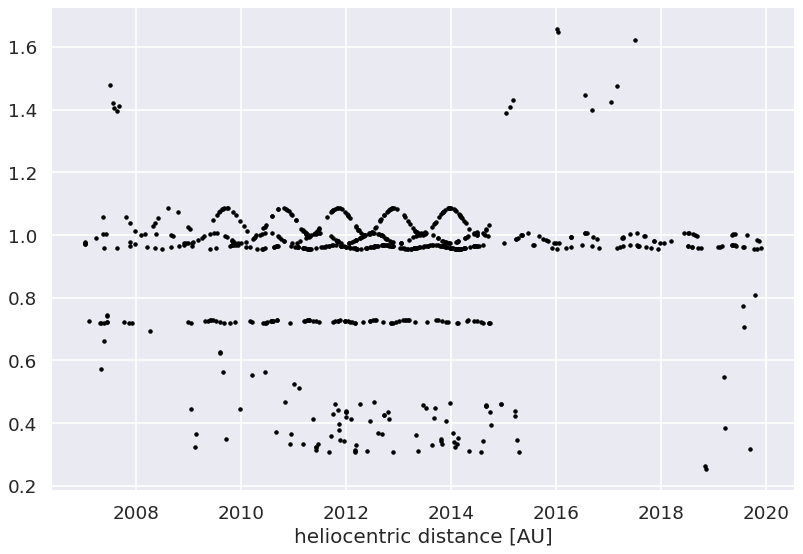

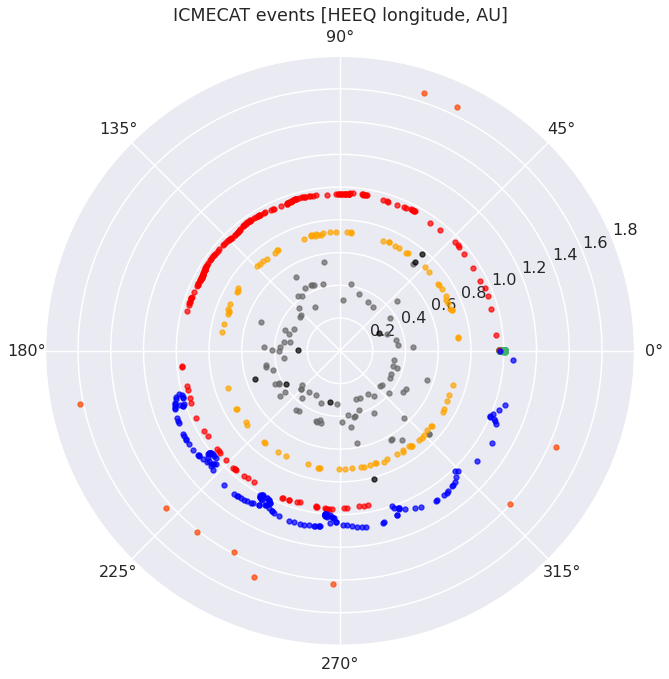

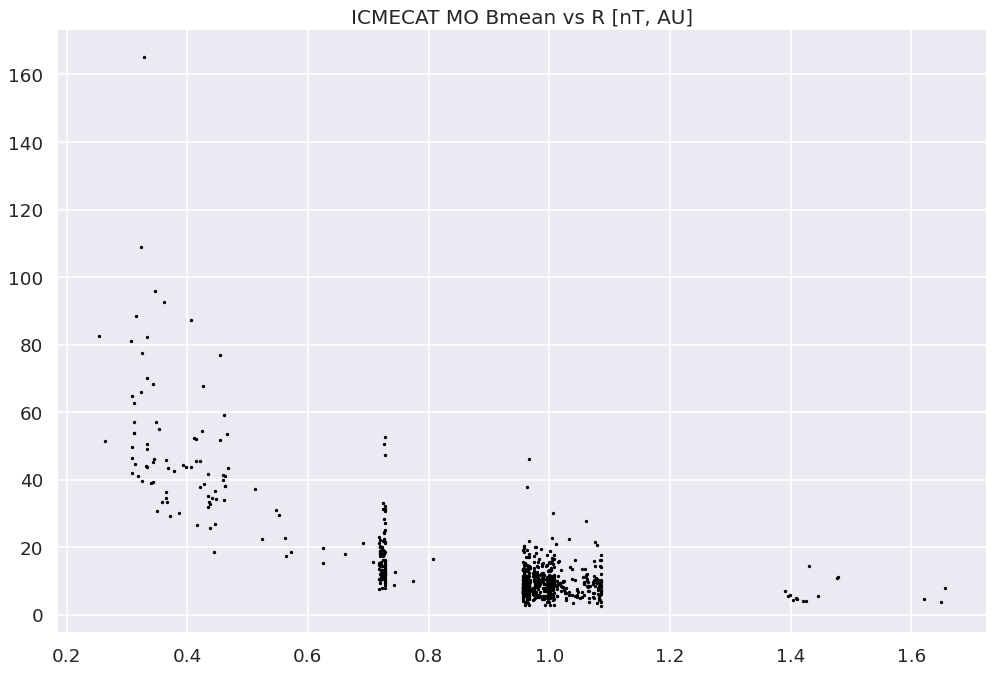

In [57]:
sns.set_context("talk")     
sns.set_style('darkgrid')

###############################################################################
fig=plt.figure(3,figsize=(12,8),dpi=80)
ic_mo_start_time_num=parse_time(ic.mo_start_time).plot_date
plt.plot_date(ic_mo_start_time_num,ic.mo_sc_heliodistance,'ok',markersize=3)
plt.xlabel('heliocentric distance [AU]')


##############################################################################
fig=plt.figure(4, figsize=(15,10), dpi=70) 
ax = plt.subplot(111,projection='polar') 

plt.title('ICMECAT events [HEEQ longitude, AU]')

#get indices for each target
imes=np.where(ic.sc_insitu=='MESSENGER')[0]
ivex=np.where(ic.sc_insitu=='VEX')[0]
iwin=np.where(ic.sc_insitu=='Wind')[0]
imav=np.where(ic.sc_insitu=='MAVEN')[0]

ista=np.where(ic.sc_insitu=='STEREO-A')[0]
istb=np.where(ic.sc_insitu=='STEREO-B')[0]
ipsp=np.where(ic.sc_insitu=='PSP')[0]
#soloi=np.where(ac.target_name=='SolarOrbiter')[0]
#bepii=np.where(ac.target_name=='BepiColombo')[0]
iuly=np.where(ic.sc_insitu=='Ulysses')[0]

#markersize
ms=25
#alpha
al=0.7

	
ax.scatter(np.radians(ic.mo_sc_long_heeq[imes]),ic.mo_sc_heliodistance	[imes],s=ms,c='dimgrey', alpha=al)
ax.scatter(np.radians(ic.mo_sc_long_heeq[ivex]),ic.mo_sc_heliodistance	[ivex],s=ms,c='orange', alpha=al)
ax.scatter(np.radians(ic.mo_sc_long_heeq[iwin]),ic.mo_sc_heliodistance	[iwin],s=ms,c='mediumseagreen', alpha=al)
ax.scatter(np.radians(ic.mo_sc_long_heeq[imav]),ic.mo_sc_heliodistance	[imav],s=ms,c='orangered', alpha=al)

ax.scatter(np.radians(ic.mo_sc_long_heeq[ista]),ic.mo_sc_heliodistance[ista],s=ms,c='red', alpha=al)
ax.scatter(np.radians(ic.mo_sc_long_heeq[istb]),ic.mo_sc_heliodistance[istb],s=ms,c='blue', alpha=al)

ax.scatter(np.radians(ic.mo_sc_long_heeq[ipsp]),ic.mo_sc_heliodistance[ipsp],s=ms,c='black', alpha=al)
#ax.scatter(np.radians(ac.target_heeq_lon[soloi]),ac.target_distance[soloi],s=ms,c='green', alpha=al)
#ax.scatter(np.radians(ac.target_heeq_lon[bepii]),ac.target_distance[bepii],s=ms,c='violet', alpha=al)
ax.scatter(np.radians(ic.mo_sc_long_heeq[iuly]),ic.mo_sc_heliodistance[iuly],s=ms,c='brown', alpha=al)

plt.ylim([0,1.8])
plt.tight_layout()



##############################################################################

fig=plt.figure(5, figsize=(15,10), dpi=80) 
plt.title('ICMECAT MO Bmean vs R [nT, AU]')
plt.plot(ic.mo_sc_heliodistance,ic.mo_bmean,'ok',markersize=2)


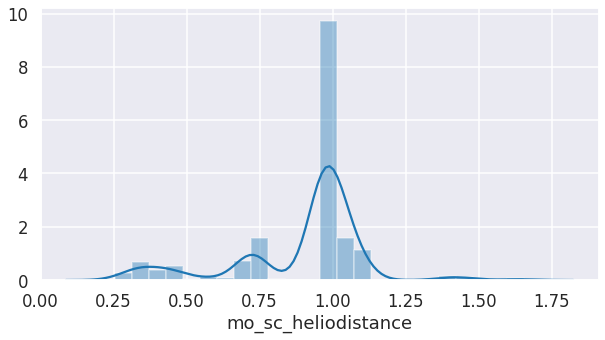

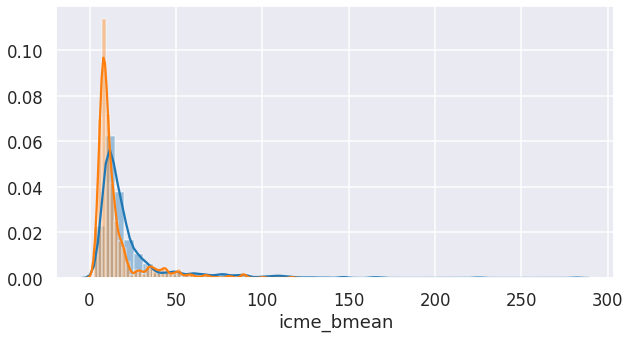

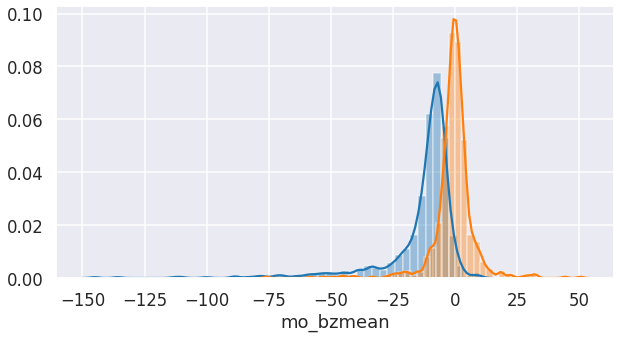

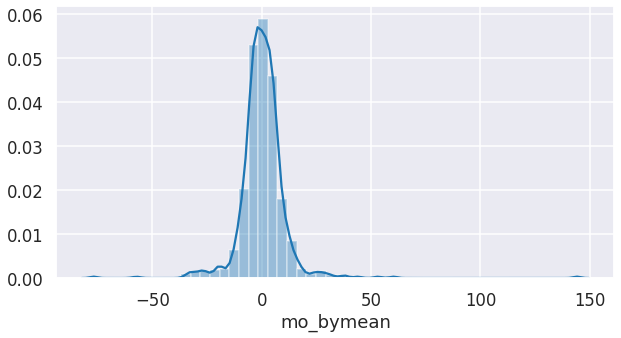

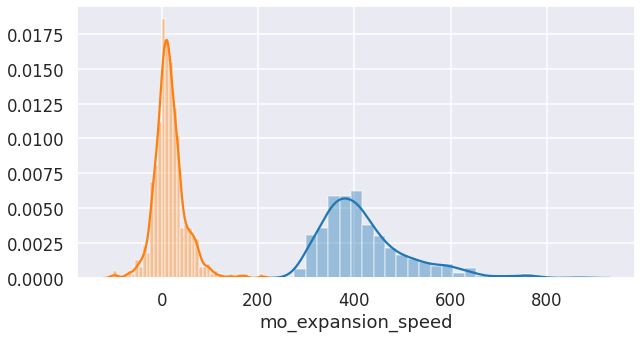

In [58]:
#make distribution plots
plt.figure(10)
sns.distplot(ic.mo_sc_heliodistance)

plt.figure(11)
sns.distplot(ic.icme_bmax)
sns.distplot(ic.icme_bmean)

plt.figure(13)
sns.distplot(ic.mo_bzmin)
sns.distplot(ic.mo_bzmean)

plt.figure(14)
sns.distplot(ic.mo_bymean)

plt.figure(15)
sns.distplot(ic.icme_speed_mean)
sns.distplot(ic.mo_expansion_speed )

# SIRCAT

In [0]:
url='https://helioforecast.space/static/sync/sircat/HELIO4CAST_SIRCAT_v10.csv'
sc=pd.read_csv(url)

In [61]:
sc

,Unnamed: 0,sircat_id,sc_insitu,hss_start_time,sir_end_time,hss_end_time,hss_vtmax_time,sc_heliodistance,sc_long_heeq,sc_lat_heeq,hss_vtmax,hss_vtmean,hss_vtstd,hss_btmax,hss_btmean,hss_btstd,hss_bzmin,hss_bzmean,hss_bzstd,hss_duration,sir_vtmax,sir_vtmean,sir_vtstd,sir_btmax,sir_btmean,sir_btstd,sir_bzmin,sir_bzmean,sir_bzstd,sir_duration
0,0,SIR_STEREO_A_JIAN_20070225_01,STEREO-A,2007-02-25T17:40Z,2007-03-01T01:10Z,2007-03-02T11:39Z,2007-02-28T20:00Z,0.9681,0.97,-7.28,692.9,505.1,110.6,13.4,5.8,2.6,-11.8,-0.1,3.2,113.98,692.9,476.5,116.7,13.4,7.0,2.3,-11.8,0.2,3.7,79.50
1,1,SIR_STEREO_A_JIAN_20070304_01,STEREO-A,2007-03-04T15:50Z,2007-03-07T20:00Z,2007-03-08T10:48Z,2007-03-07T12:33Z,0.9675,1.18,-7.35,693.2,479.3,77.4,11.0,5.9,2.2,-6.9,0.9,2.8,90.97,693.2,475.0,82.7,11.0,6.5,1.9,-6.9,1.1,3.0,76.17
2,2,SIR_STEREO_A_JIAN_20070311_01,STEREO-A,2007-03-11T03:47Z,2007-03-14T06:30Z,2007-03-18T05:15Z,2007-03-14T10:04Z,0.9668,1.40,-7.30,737.2,563.5,96.7,13.1,5.2,2.1,-8.5,-0.4,2.6,169.47,727.8,522.2,121.7,13.1,7.2,1.6,-8.5,-0.3,3.3,74.72
3,3,SIR_STEREO_A_JIAN_20070323_01,STEREO-A,2007-03-23T03:10Z,2007-03-28T12:00Z,2007-03-28T21:54Z,2007-03-27T22:43Z,0.9657,1.89,-6.95,612.0,433.5,70.2,12.2,6.1,2.2,-10.6,0.2,3.7,138.73,612.0,428.6,70.2,12.2,6.4,1.9,-10.6,0.2,3.8,128.83
4,4,SIR_STEREO_A_JIAN_20070329_01,STEREO-A,2007-03-29T13:30Z,2007-04-03T08:00Z,2007-04-05T02:13Z,2007-04-02T23:00Z,0.9650,2.20,-6.63,686.0,475.2,95.7,12.5,4.9,1.8,-11.9,0.4,2.5,156.72,686.0,454.1,101.1,12.5,5.4,1.9,-11.9,0.3,2.7,114.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,926,SIR_WIND_GRANDIN_20171115_01,Wind,2017-11-15T03:00Z,NaN,2017-11-17T01:00Z,2017-11-16T12:52Z,0.9806,0.19,2.81,533.6,444.6,43.3,14.8,6.7,3.0,-9.3,0.1,3.7,46.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
927,927,SIR_WIND_GRANDIN_20171120_01,Wind,2017-11-20T14:00Z,NaN,2017-11-22T20:00Z,2017-11-21T14:47Z,0.9796,0.15,2.16,648.7,504.7,75.3,15.5,6.0,2.9,-10.0,0.1,3.2,54.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
928,928,SIR_WIND_GRANDIN_20171204_01,Wind,2017-12-04T11:00Z,NaN,2017-12-08T08:00Z,2017-12-06T03:38Z,0.9773,0.03,0.42,637.8,488.4,74.7,13.6,5.6,2.8,-12.8,-0.8,3.0,93.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
929,929,SIR_WIND_GRANDIN_20171211_01,Wind,2017-12-11T02:00Z,NaN,2017-12-13T05:00Z,2017-12-12T07:42Z,0.9764,-0.03,-0.42,518.1,443.9,45.6,12.5,7.2,1.7,-10.6,0.2,3.8,51.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


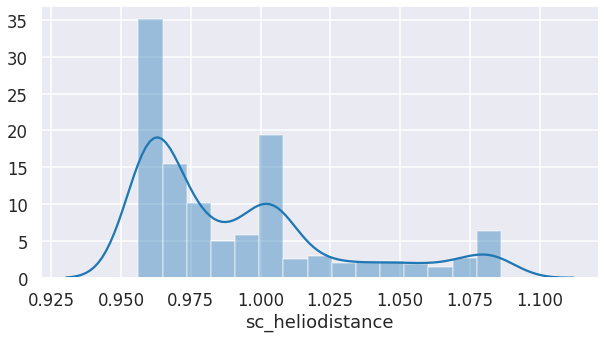

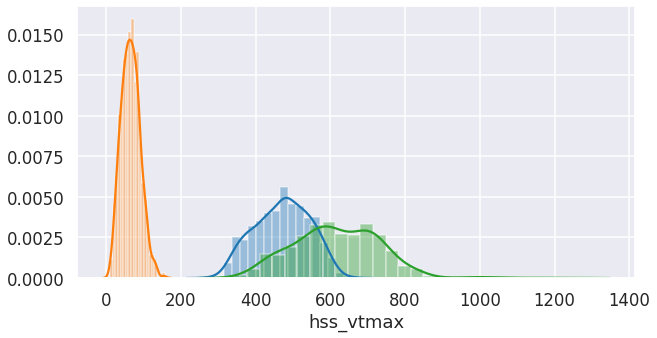

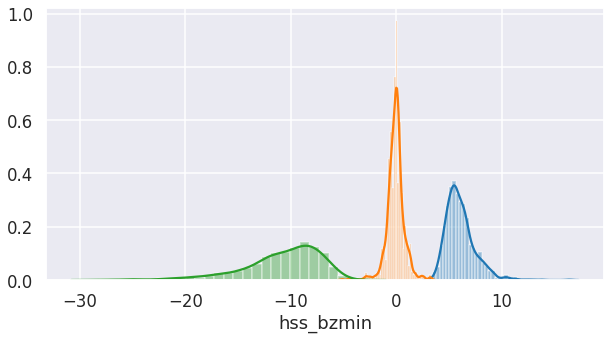

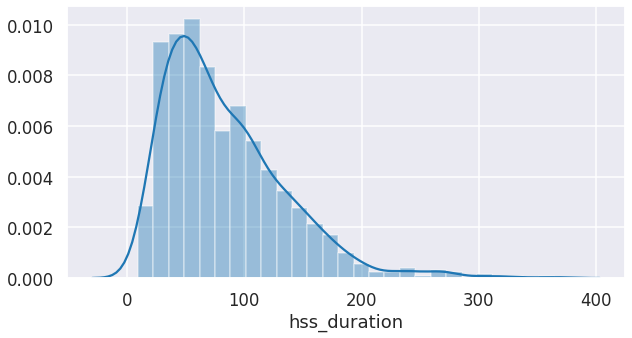

In [70]:
#make distribution plots
plt.figure(20)
sns.distplot(sc.sc_heliodistance)

plt.figure(21)
sns.distplot(sc.hss_vtmean)
sns.distplot(sc.hss_vtstd)
sns.distplot(sc.hss_vtmax)


plt.figure(22)
sns.distplot(sc.hss_btmean)
sns.distplot(sc.hss_bzmean)
sns.distplot(sc.hss_bzmin)


plt.figure(23)
sns.distplot(sc.hss_duration)

# plt.figure(23)
# 
# plt.figure(24)
# sns.distplot(ic.mo_bymean)

# plt.figure(25)
# sns.distplot(ic.icme_speed_mean)
# sns.distplot(ic.mo_expansion_speed )